# Project 

# BUSINESS UNDERSTANDING

# OVERVIEW

The phrase "water is life" has been repeated many times. Water bodies aren't just beautiful additions to our planet's scenery; they also play a crucial role in our survival. Consequently, water is truly life. Water is important for domestic purposes, economic activities (such as production of electricity in the energy sector) and in health and hygiene. Recent data from the World Bank show that Tanzania has a population of about 60 million. According to Nsemwa (2022) many Tanzanians continue to struggle with insufficient or limited access to clean and safe water. Only 30.6% of Tanzanian households use recommended water treatment methods, and only 22.8% have adequate hand-washing facilities (Ministry of Health report, 2019). Poor sanitation is estimated to cause 432,000 diarrhea-related deaths per year and is a major contributor to several Neglected Tropical Diseases (NTDs) such as intestinal worms, schistosomiasis, and trachoma. Malnutrition is also made worse by poor sanitation (WHO, 2019).

# Tanzanian Water Wells

## Project Description

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

Build a classifier to predict the condition of a water well, using information about the sort of pump, when it was installed, etc. Your audience could be an NGO focused on locating wells needing repair, or the Government of Tanzania looking to find patterns in non-functional wells to influence how new wells are built. Note that this is a ternary classification problem by default, but can be engineered to be binary.

## Objective

The main objective of this study is to **build a model that classifies the functional status of water wells in Tanzania.** With this predictive model, the ministry can understand which water points are functional and non-functional, give useful information for future wells, and identify areas at risk of water shortage.

### **Specific Objectives**
- To aid in improving maintenance operations by focusing inspections on the water points that have a high likelihood of requiring repair or having failed altogether

- To provide 70%-75% accurate predictions on the functionality of wells

- To determine if functionality varies by quantity.

- To determine the functionality status concerning payment type. 

#### Business Success Criteria

- Improve the performance of the Tanzania water sector

#### Project Success Criteria

- Build a model that meets the following criteria:

- Use machine learning models to correctly classify wells with an accuracy score of 70% - 75%


#### **Project plan**:

- Business Understanding

- Data Understanding

- Data Preparation

- Exploratory Data Analysis

- Data Preparation

- Modeling

### Data Understanding

**Overview**:

Using the data we have, I will attempt to gain more insight on how to construct the best model that predicts how waterpoints in the focus region that is the country: Tanzania are designed. In this phase of the investigation, the study inspected the data in an attempt to seek a deeper understanding about the data.

### Data Description

The **target** variable is status_group with the labels:

`functional` - the waterpoint is operational and there are no repairs needed
`functional needs repair` - the waterpoint is operational, but needs repairs
`non functional` - the waterpoint is not operational

The **predictor** variables in this data include:

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint



### Load the data

The data has been split into target variable, features and test values. I will work on each one idividually. 

In [58]:
# Import the necessary libraries
 
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

# Load the training target data
target = pd.read_csv("data/training_set_labels.csv")

# Preview a few rows
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [59]:
# Checking for null values 
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


__**Note**: No null values in the target column

<Axes: xlabel='status_group'>

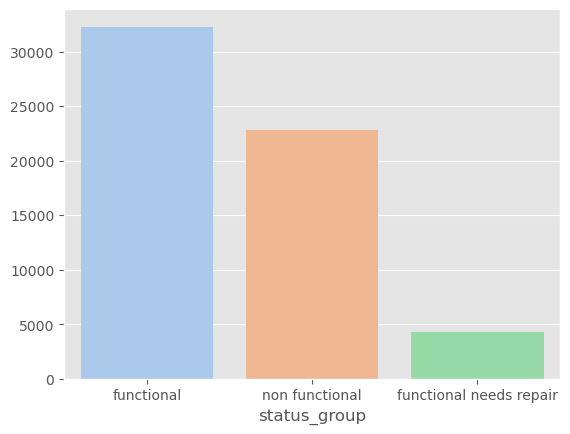

In [60]:
# Visualize the distribution of the data

data = target.groupby("status_group").agg("size").sort_values(ascending=False)
sns.barplot(x=data.index, y=data, palette="pastel")

### Cleaning Target Data

I will modify the target data from strings to integers where:

- *non functional* is **0**
- *functional* is **1**
- *functional needs repair* is **2**

In [61]:
# Replace target values - there are three classes
target = target.replace({'status_group': {'functional' : 1, 
                                'non functional' : 0, 
                                'functional needs repair' : 2}})

# Preview results
target.iloc[15:20]

,id,status_group
15,61848,1
16,48451,0
17,58155,0
18,34169,2
19,18274,1


### The Features

First I will load the featuresand after determining their description I will move on to cleaning. 

In [62]:
# Load the features data

features = pd.read_csv("data/training_set_values.csv")

# preview the data
features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [63]:
# Loading the test set values
testing_data = pd.read_csv('data/test_set_values.csv')

testing_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [64]:
# Merge the two dataframes
df = pd.merge(target, features, on="id")

# preview the new dataframe
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,1,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,1,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,1,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [65]:
# Preview the last five rows of data
df.tail()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,1,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,1,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,1,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,1,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,1,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [66]:
# Getting the shape of the data
df.shape

(59400, 41)

In [67]:
# Datframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  int64  
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [68]:
# Obtaining the summary descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
status_group,59400.0,0.688434,0.599877,0.00000,0.000000,1.000000,1.000000,2.000000e+00
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04


In [69]:
# View all categorical features
df.describe(include=["object"]).T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,55763,1896,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59398,37399,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,56066,2,True,51011


In [70]:
# Determine percentage of null values
df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

### Observations

- `region_code` and `district_code` seem like they should be categorical features. 
- `id` does not seem relevant.

In [71]:
# Getting the data types of the data
df.dtypes.value_counts()

object     30
int64       8
float64     3
Name: count, dtype: int64

_There are `11` numeric features in the data and `30` string features in the data._

## Data Cleaning

Now I will be looking throught each column of the data and perform the necessary cleaning.

In [72]:
# List all columns for easier visibility
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [73]:
df.source_class.value_counts()

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

In [74]:
df.management_group.value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

_`other` and `unknown` are similar_

In [75]:
df.payment.value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

_`other` and `unknown` are similar_

In [76]:
df.source_class.value_counts().tail(10)

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

In [77]:
df.num_private.value_counts().head(10)

num_private
0     58643
6        81
1        73
5        46
8        46
32       40
45       36
15       35
39       30
93       28
Name: count, dtype: int64

In [78]:
df.lga.value_counts()

lga
Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: count, Length: 125, dtype: int64

In [79]:
df.district_code.value_counts().head(10)

district_code
1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
Name: count, dtype: int64

In [80]:
df.population.value_counts().head(10)

population
0      21381
1       7025
200     1940
150     1892
250     1681
300     1476
100     1146
50      1139
500     1009
350      986
Name: count, dtype: int64

In [81]:
df.construction_year.value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

In [82]:
repetitive_and_unuseful = ['date_recorded', 'num_private', 'wpt_name', 'construction_year',
                     'subvillage', 'region_code', 'district_code', 'lga',
                     'ward', 'public_meeting', 'recorded_by', 'scheme_management',
                     'scheme_name', 'extraction_type', 'extraction_type_group', 
                      'water_quality', 'source','source_type', 'waterpoint_type_group',
                     'payment_type', 'management', 'id', 'quantity_group']
print(f" There are {repetitive_and_unuseful.__len__()} columns that we do no need in the data")

 There are 23 columns that we do no need in the data


After going through the variable description of the data and performing the preliminary data inspection, the study has proposed that the columns categorized as repetitive_and_unuseful be dropped on the basis that some provide similar information and some do not provide any relevant information, such as public_meeting and num_private.

In [83]:
# dropping irrelevant columns
data = df.drop(repetitive_and_unuseful, axis=1)

In [84]:
print(f"The new data has {data.shape[0]} rows and {data.shape[1]} columns")

The new data has 59400 rows and 18 columns


In [85]:
#  Checking for duplicated entries
data[['latitude', 'longitude']].duplicated().sum()

1880

In [86]:
# Remove the duplicates
data = data.drop_duplicates(subset = ["latitude", "longitude"])

In [87]:
# Check for duplicates
data.duplicated().sum()

0

### Checking for and Handling missing values

In [88]:
# Check for missing values
data.isna().sum()

status_group                0
amount_tsh                  0
funder                   3611
gps_height                  0
installer                3623
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
permit                   3043
extraction_type_class       0
management_group            0
payment                     0
quality_group               0
quantity                    0
source_class                0
waterpoint_type             0
dtype: int64

In [89]:
#checking for the percentage of missing values of data points in each column
percentages = (data.isna().sum() / len(data)) * 100
percentages.sort_values(ascending=False)

installer                6.298679
funder                   6.277816
permit                   5.290334
status_group             0.000000
source_class             0.000000
quantity                 0.000000
quality_group            0.000000
payment                  0.000000
management_group         0.000000
extraction_type_class    0.000000
population               0.000000
amount_tsh               0.000000
region                   0.000000
basin                    0.000000
latitude                 0.000000
longitude                0.000000
gps_height               0.000000
waterpoint_type          0.000000
dtype: float64

_Since this is a small percentage of the data, less than **10%**, I will drop all the missing rows without sacrificing a a large percentage of data. First I will preview the missing data in the columns_

In [90]:
for col in ['funder', 'installer', 'permit']:
    print(f"For column {col}:")
    print(f"There are {data[col].nunique()} unique values in this column")
    print("------------------")

For column funder:
There are 1857 unique values in this column
------------------
For column installer:
There are 2113 unique values in this column
------------------
For column permit:
There are 2 unique values in this column
------------------


In [91]:
# creating an array of densities to impute missing values for permit
densities = list(data.permit.value_counts(normalize=True))

# previewing densities
densities

[0.6985516823613636, 0.3014483176386365]

In [92]:
#setting seed for reproducibility
np.random.seed(0)

In [93]:
# Defining a function to fill missing values for permit
def impute_missing(value):
    '''A function that fills missing values for permit'''
    if value not in [0,1]:
        return np.random.choice([0,1], p=densities)
    else:
        return value
    
# Applying the function to the column permit    
data['permit'] = data['permit'].map(lambda x: impute_missing(x))

In [94]:
for col in ['funder', 'installer', 'permit']:
    print('For', col,':')
    print('The densities are:', data[col].value_counts(normalize=True).\
        sort_values(ascending=False).head())
    print("Number of missing values are : {}".format(data[col].isna().sum()))
    print("-----------------------------")

For funder :
The densities are: funder
Government Of Tanzania    0.163869
Danida                    0.057764
Hesawa                    0.035504
World Bank                0.024949
Kkkt                      0.023874
Name: proportion, dtype: float64
Number of missing values are : 3611
-----------------------------
For installer :
The densities are: installer
DWE           0.301520
Government    0.030985
RWE           0.021652
Commu         0.019667
DANIDA        0.019482
Name: proportion, dtype: float64
Number of missing values are : 3623
-----------------------------
For permit :
The densities are: permit
True     0.678025
False    0.321975
Name: proportion, dtype: float64
Number of missing values are : 0
-----------------------------


The missing values from permit have been imputed successfully using a user-defined function based on the probability densities of the feature. But the columns installer and funder still have missing values due to the fact that they are string values and the study thought it wise to remove those entries.

In [95]:
# Dropping missing values from  installer and funder along the rows
data = data.dropna(axis=0)

# Checking once more for missing values
data.isna().sum()

status_group             0
amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
extraction_type_class    0
management_group         0
payment                  0
quality_group            0
quantity                 0
source_class             0
waterpoint_type          0
dtype: int64

_There are no more missing values in the data._

### Type casting invalid data formats to correct formats

In [96]:
for col in ['basin', 'region', 'extraction_type_class', 'management_group',
            'payment', 'quality_group', 'quantity', 'source_class',
            'waterpoint_type']:
    data[col] = data[col].astype('category')
data.dtypes

status_group                int64
amount_tsh                float64
funder                     object
gps_height                  int64
installer                  object
longitude                 float64
latitude                  float64
basin                    category
region                   category
population                  int64
permit                     object
extraction_type_class    category
management_group         category
payment                  category
quality_group            category
quantity                 category
source_class             category
waterpoint_type          category
dtype: object

In [97]:
# checking the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53844 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   status_group           53844 non-null  int64   
 1   amount_tsh             53844 non-null  float64 
 2   funder                 53844 non-null  object  
 3   gps_height             53844 non-null  int64   
 4   installer              53844 non-null  object  
 5   longitude              53844 non-null  float64 
 6   latitude               53844 non-null  float64 
 7   basin                  53844 non-null  category
 8   region                 53844 non-null  category
 9   population             53844 non-null  int64   
 10  permit                 53844 non-null  object  
 11  extraction_type_class  53844 non-null  category
 12  management_group       53844 non-null  category
 13  payment                53844 non-null  category
 14  quality_group          53844 non-null  cate

In [98]:
# Saving cleaned data set for later use
data.to_csv('./Data/cleaned_data.csv')

### Exploratory Data Analysis

In this phase of the investigation, the study will look at the trends, patterns using visualizations and statistics to show the relationships between the variables within the data.

### Univariate Analysis

#### Feature funder

In [100]:
data.funder.dtype

dtype('O')

In [101]:
print(f"There are {data.funder.nunique()} unique values of funder")

There are 1846 unique values of funder


In [102]:
# creating a function that returns a dictionary of value counts
def info_dict(data, col):
    """A function that zips the values and value_counts of string objects
    and returns the top 20"""
    name = list(data[col].value_counts().index[:20])
    val = list(data[col].value_counts().values[:20])
    info = dict(zip(name, val))
    return info
print("The top 20 funders of wells in this data are:")
print("name: ,  number of wells:")
top_20_funders = info_dict(data, 'funder')
top_20_funders

The top 20 funders of wells in this data are:
name: ,  number of wells:


{'Government Of Tanzania': 8831,
 'Danida': 3114,
 'Hesawa': 1909,
 'World Bank': 1334,
 'Kkkt': 1287,
 'World Vision': 1217,
 'Rwssp': 1186,
 'Unicef': 1035,
 'District Council': 842,
 'Tasaf': 833,
 'Dhv': 829,
 'Private Individual': 824,
 '0': 766,
 'Norad': 764,
 'Germany Republi': 610,
 'Tcrs': 601,
 'Ministry Of Water': 586,
 'Water': 583,
 'Dwe': 484,
 'Netherlands': 461}

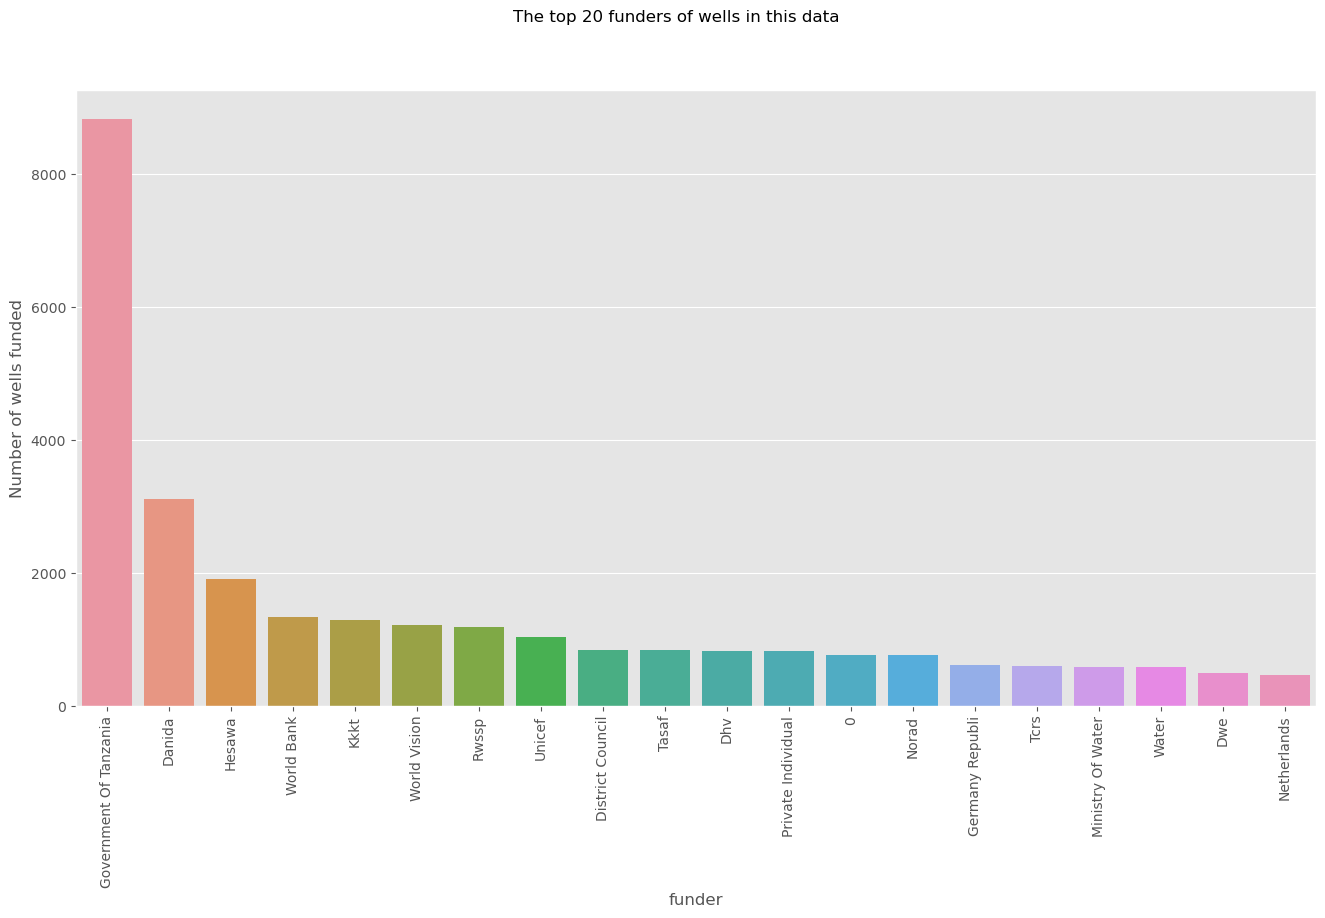

In [103]:
# Plot the top 20 founders
plt.figure(figsize=(16,8))
sns.barplot(x=data['funder'].value_counts().index[:20], y=data['funder'].value_counts().values[:20])
plt.suptitle("The top 20 funders of wells in this data")
plt.ylabel("Number of wells funded")
plt.xlabel("funder")
plt.xticks(rotation=90)
plt.show()

**Observations:**

The top 5 funders are:
- Government of Tanzania
- Danida
- Hesawa
- World Bank
- Kkkt

#### Feature gps_height

In [104]:
# summary statistics of height in metres
data.gps_height.describe().T

count    53844.000000
mean       700.271469
std        691.628522
min        -90.000000
25%          0.000000
50%        459.000000
75%       1330.000000
max       2770.000000
Name: gps_height, dtype: float64

<Figure size 1600x800 with 0 Axes>

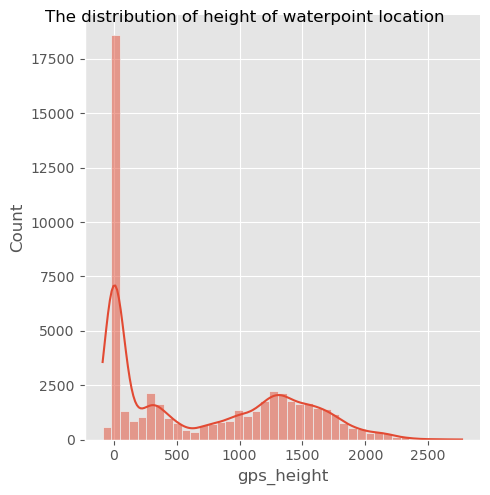

In [110]:
# plotting the distribution of gps_height
plt.figure(figsize=(16,8))
sns.displot(data=data.gps_height, kde=True)
plt.suptitle("The distribution of height of waterpoint location")
plt.show()

**Observations:**

The distribution of gps_height does not seem to be normally distributed. This will be dealt with later on

#### Feature installer

In [106]:
# What is the type of the variable funder
data.installer.dtype

dtype('O')

In [107]:
print(f"There are {data.installer.nunique()} unique values of installer.")

There are 2107 unique values of installer.


In [108]:
# Applying the info_dict function to get a dictionary of value counts and values
print("The top 20 installers of wells in this data are:")
print("name: ,  number of wells:")
top_20_installers = info_dict(data, 'installer')

The top 20 installers of wells in this data are:
name: ,  number of wells:


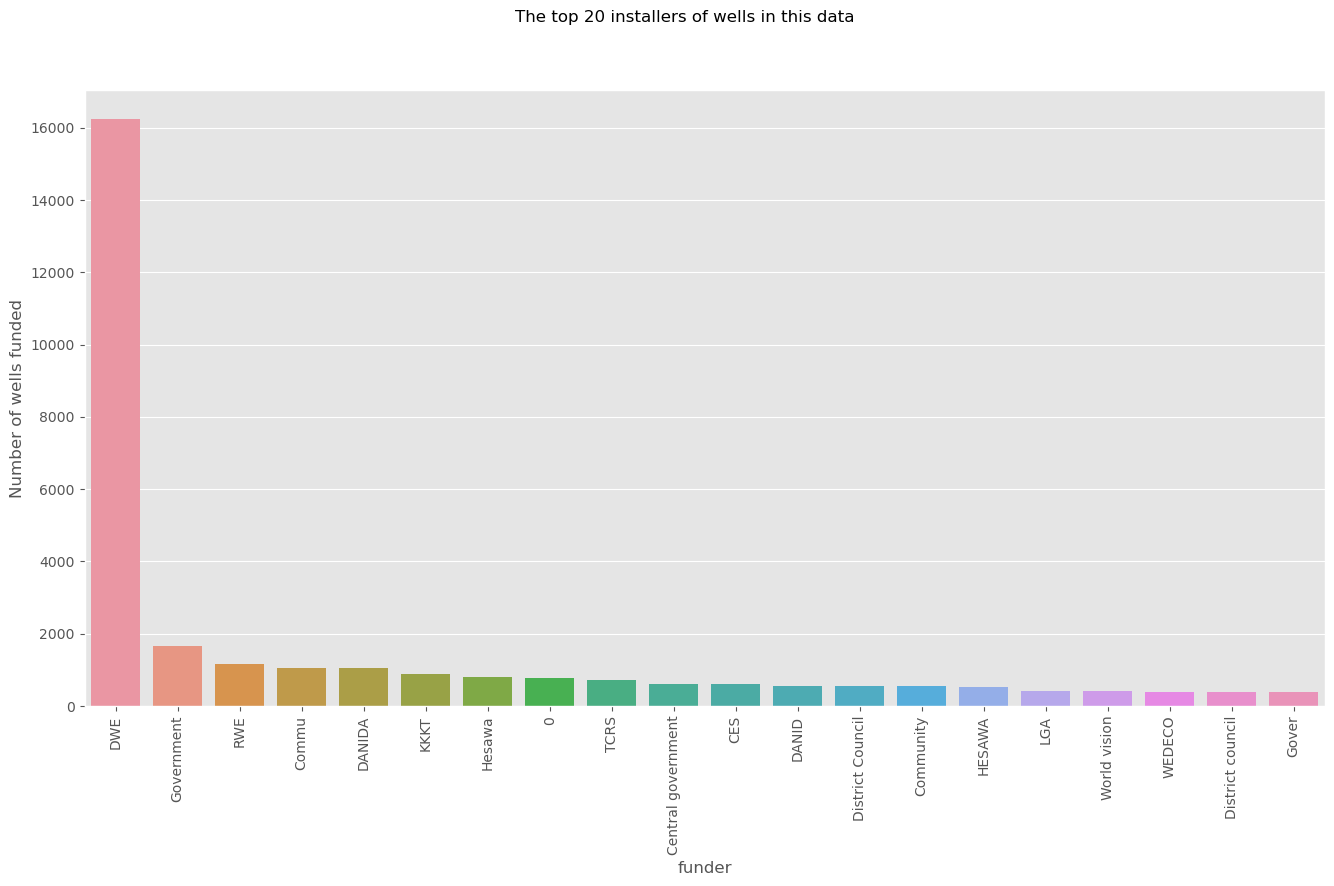

In [115]:
# Plot the top 20 founders
plt.figure(figsize=(16,8))

# Ensure correct data is passed to sns.bar
sns.barplot(x=data['installer'].value_counts().index[:20], y=data['installer'].value_counts().values[:20])

plt.suptitle("The top 20 installers of wells in this data")
plt.ylabel("Number of wells funded")
plt.xlabel("funder")
plt.xticks(rotation=90)
plt.show()

**The top 5 installers of wells are:**

- DWE
- Government
- RWE
- Commu
- DANIDA
It is quite interesting that both DANIDA and Government make an appearance on the list of top 5 funders and top 5 installers.

#### Feature extraction_type_class

In [116]:
# Getting the value counts
data['extraction_type_class'].value_counts()

extraction_type_class
gravity         24589
handpump        14646
other            5720
submersible      5679
motorpump        2650
rope pump         448
wind-powered      112
Name: count, dtype: int64

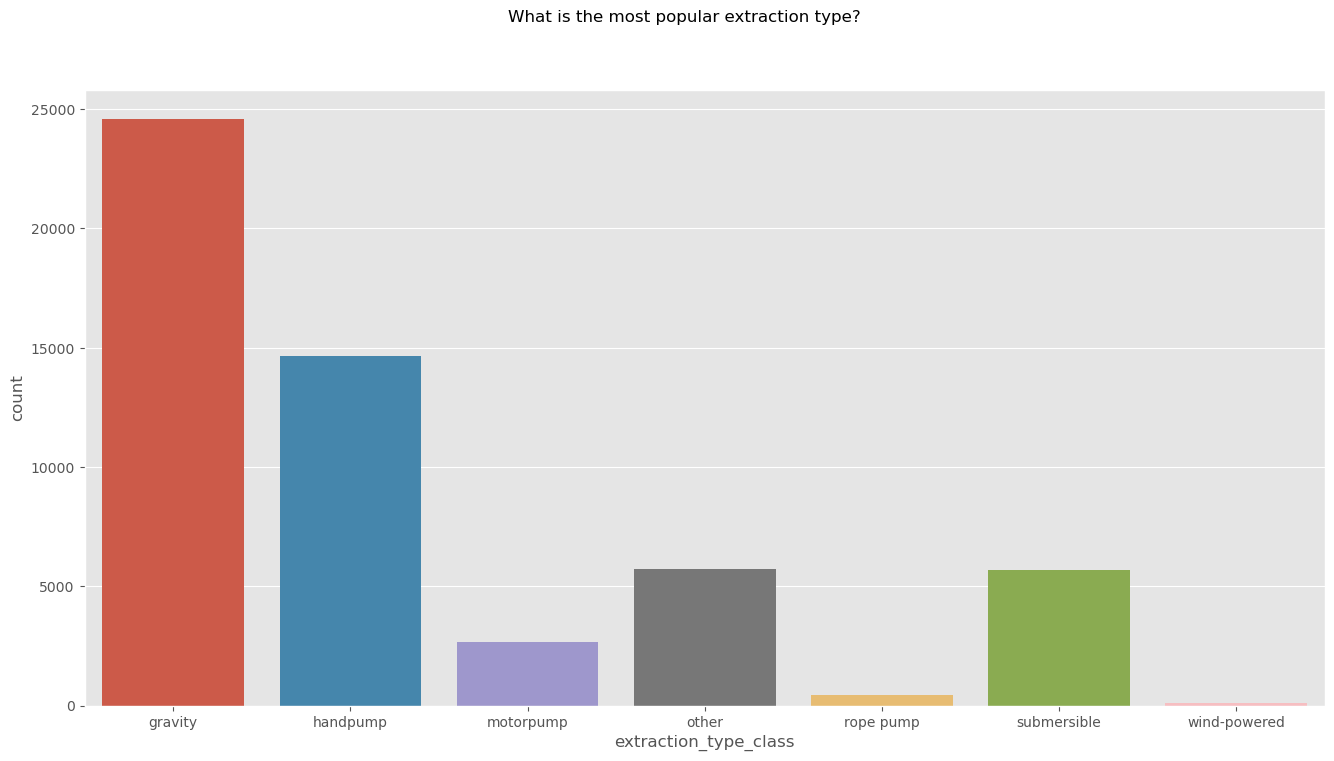

In [117]:
# Analysing extraction type class  column
plt.figure(figsize=(16,8))
sns.countplot(x='extraction_type_class', data=data)
plt.suptitle("What is the most popular extraction type?")
plt.show()

**Observations:**

**Gravity** seems to be the most popular extraction type, followed by **handpump** and **submersible**.The least popular is wind powered

#### Feature waterpoint_type

In [118]:
# These are the types of waterpoint:
data['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             25600
hand pump                      15645
communal standpipe multiple     5919
other                           5824
improved spring                  740
cattle trough                    109
dam                                7
Name: count, dtype: int64

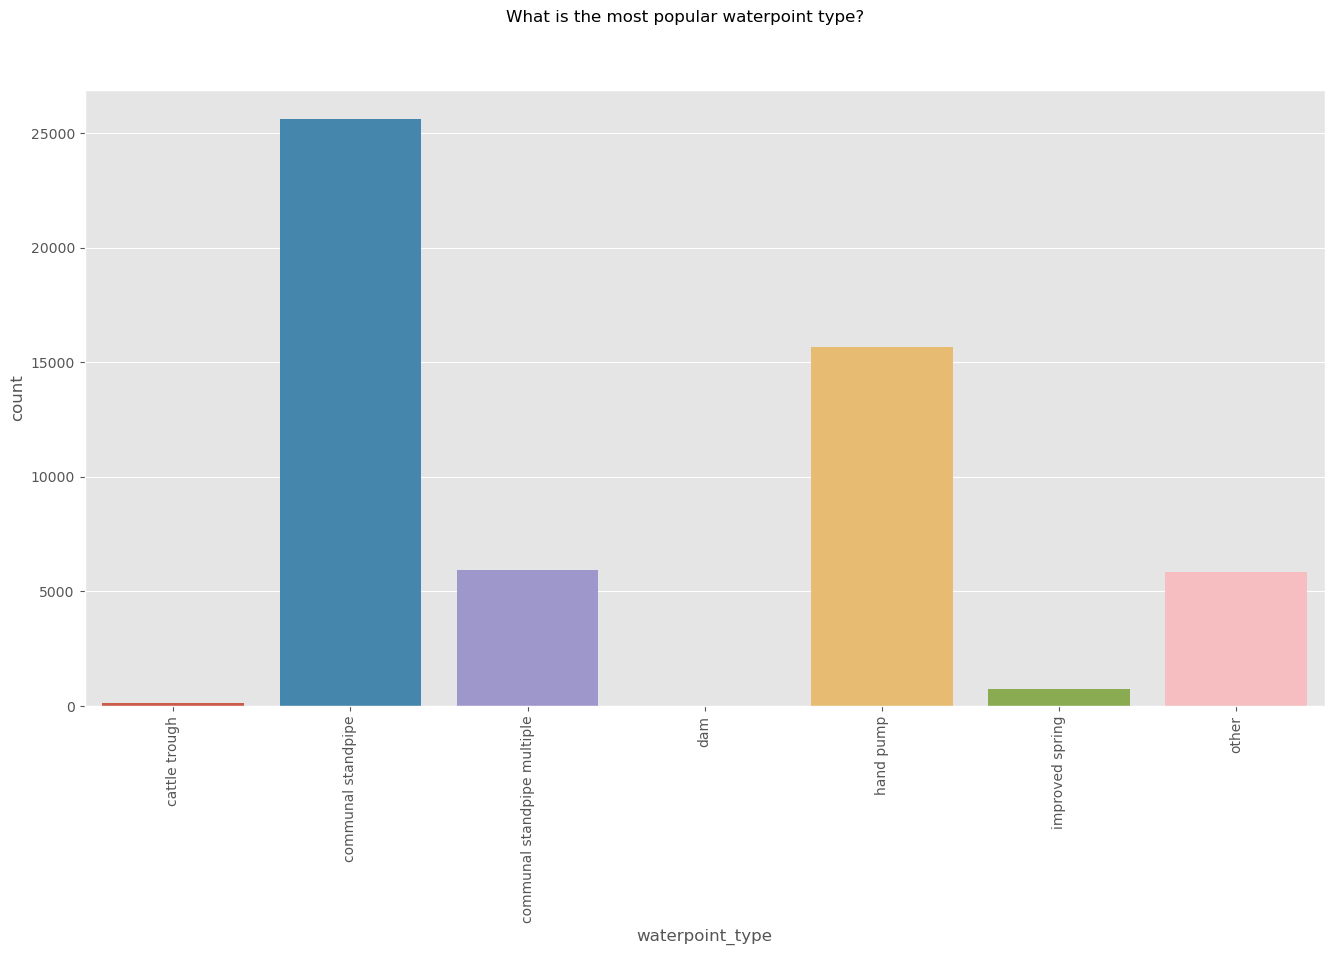

In [119]:
# Plotting the most popular waterpoint type
plt.figure(figsize=(16,8))
sns.countplot(x='waterpoint_type', data=data)
plt.suptitle("What is the most popular waterpoint type?")
plt.xticks(rotation=90)
plt.show()

**Observations:**
The most featured waterpoint type is **communal** standpipe followed by **handpump**. The least featured is dam.

#### Feature payment

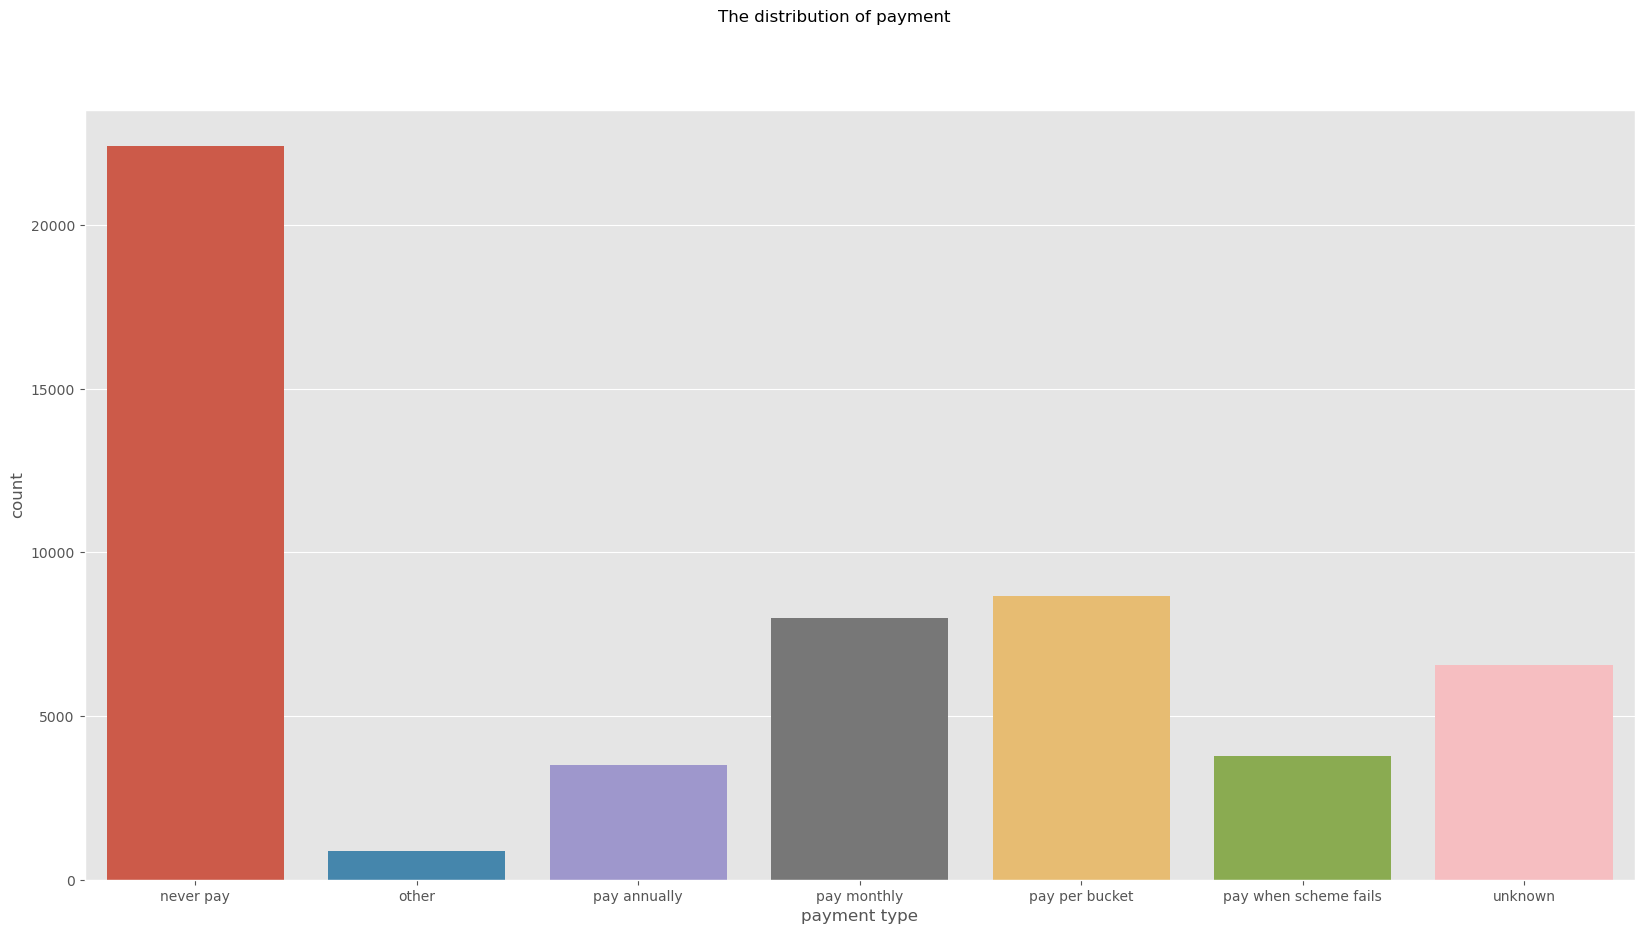

In [120]:
# Plotting the variable payment
plt.figure(figsize=(20,10))
sns.countplot(x='payment', data=data)
plt.suptitle("The distribution of payment")
plt.xlabel('payment type')
plt.show()

**Observations**
Wells that are not payed for feature the most in this data, followed by pay per bucket, unknown and pay monthly.

The least occuring are pay annually, pay when scheme fails and other.

#### Feature quality_group

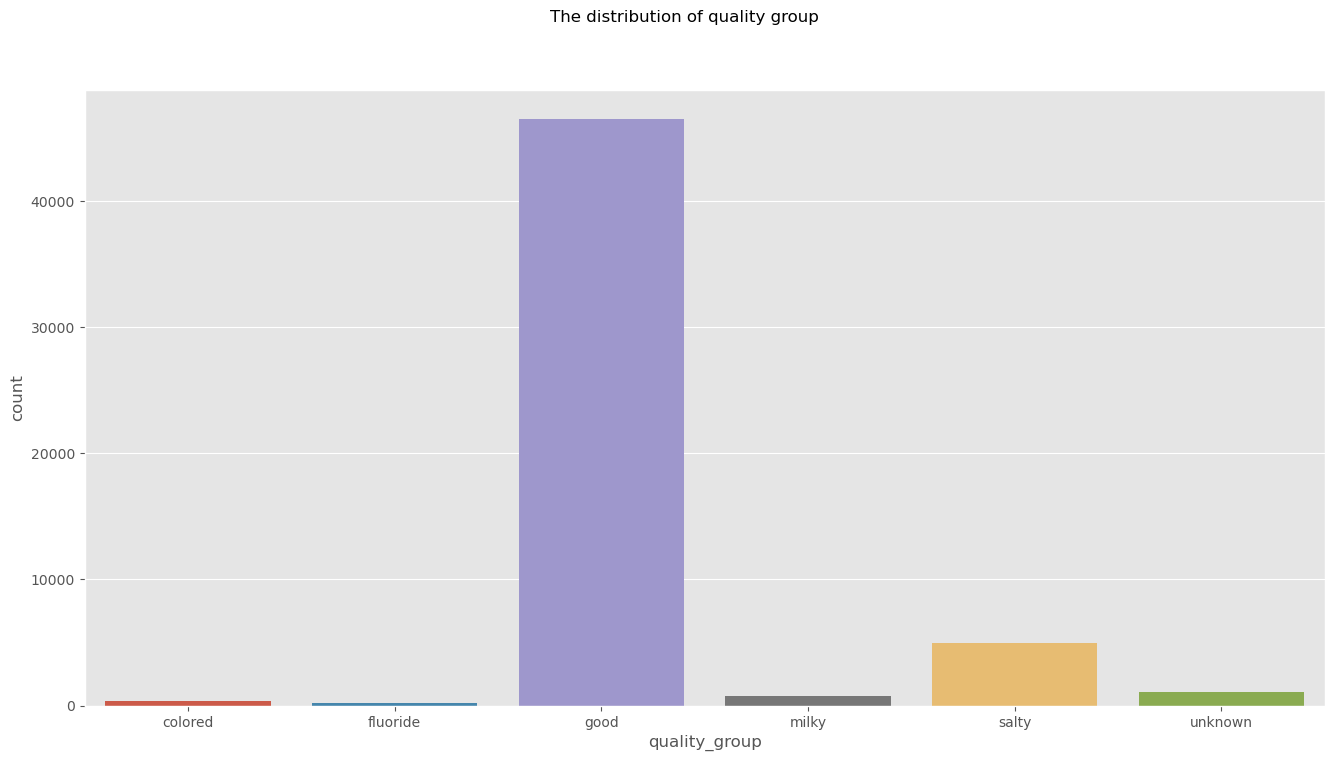

In [121]:
# plotting the distribution of quality group
plt.figure(figsize=(16,8))
sns.countplot(x='quality_group', data=data)
plt.suptitle("The distribution of quality group")
plt.show()

**Observations:**
The most featured quality group is good followed by salty and the least is fluoride.

#### Feature basin

In [122]:
# Count of number of wells per basin
basin_dict = dict(zip(list(data.basin.value_counts().index),
                       list(data.basin.value_counts().values)))
basin_dict

{'Pangani': 8812,
 'Lake Victoria': 8331,
 'Rufiji': 7196,
 'Internal': 6588,
 'Lake Tanganyika': 6301,
 'Wami / Ruvu': 5916,
 'Ruvuma / Southern Coast': 4482,
 'Lake Nyasa': 3768,
 'Lake Rukwa': 2450}

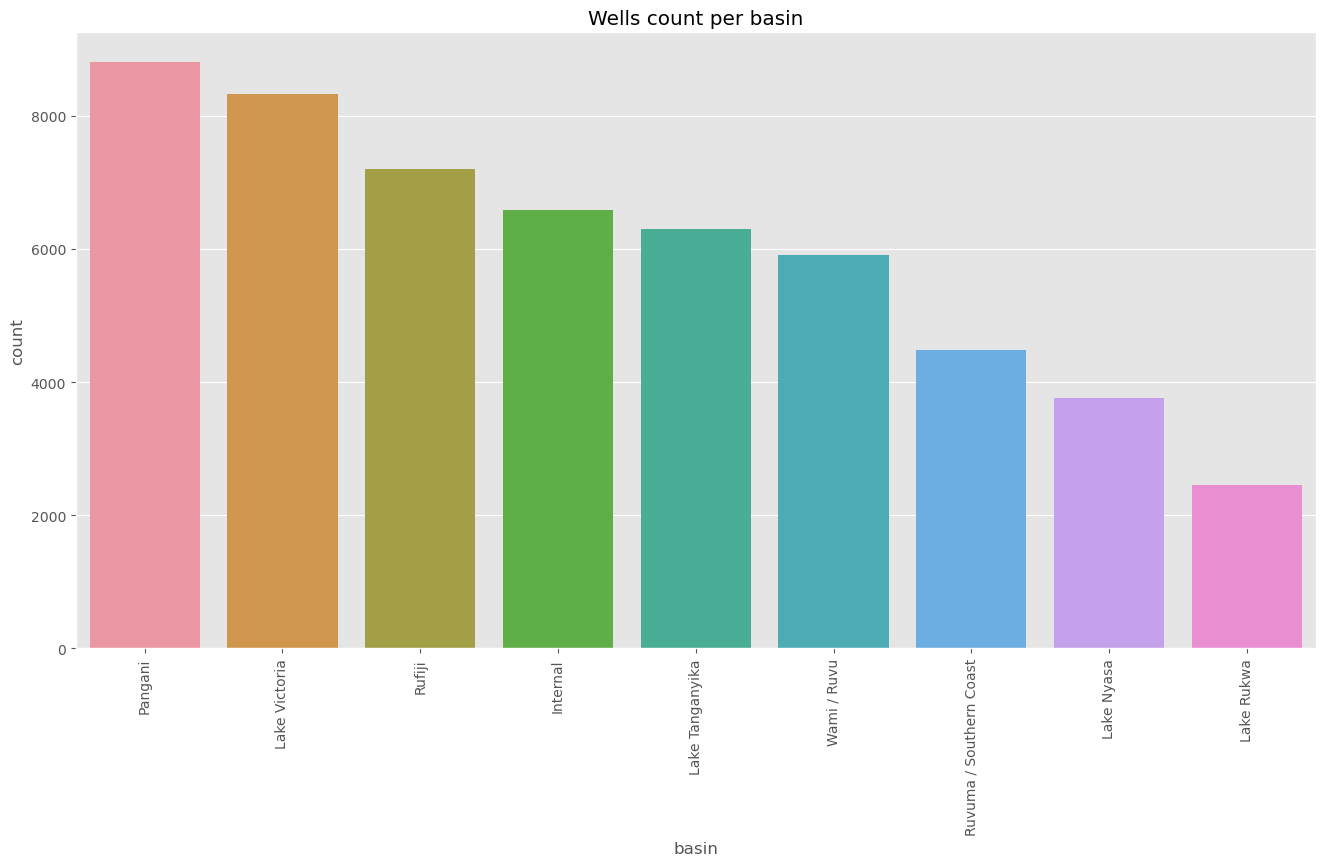

In [123]:
# Analysing basin column
plt.figure(figsize=(16,8))
sns.countplot(x =data.basin,
              order = data['basin'].value_counts().index).set(title="Wells count per basin")
plt.xticks(rotation=90);

**Observations:**
Most wells are located near the Pangani basin, whereas the Lake Rukwa basin has the lowest number of wells

#### Feature region

In [125]:
# Count of number of wells per region
region_dict = dict(zip(list(data.region.value_counts().index),
                       list(data.region.value_counts().values)))
region_dict

{'Iringa': 5284,
 'Kilimanjaro': 4373,
 'Morogoro': 3972,
 'Shinyanga': 3940,
 'Kagera': 3205,
 'Arusha': 3024,
 'Kigoma': 2805,
 'Mbeya': 2703,
 'Ruvuma': 2638,
 'Tanga': 2546,
 'Pwani': 2497,
 'Mwanza': 2228,
 'Dodoma': 2196,
 'Mara': 1953,
 'Tabora': 1940,
 'Rukwa': 1803,
 'Mtwara': 1725,
 'Manyara': 1580,
 'Lindi': 1542,
 'Singida': 1124,
 'Dar es Salaam': 766}

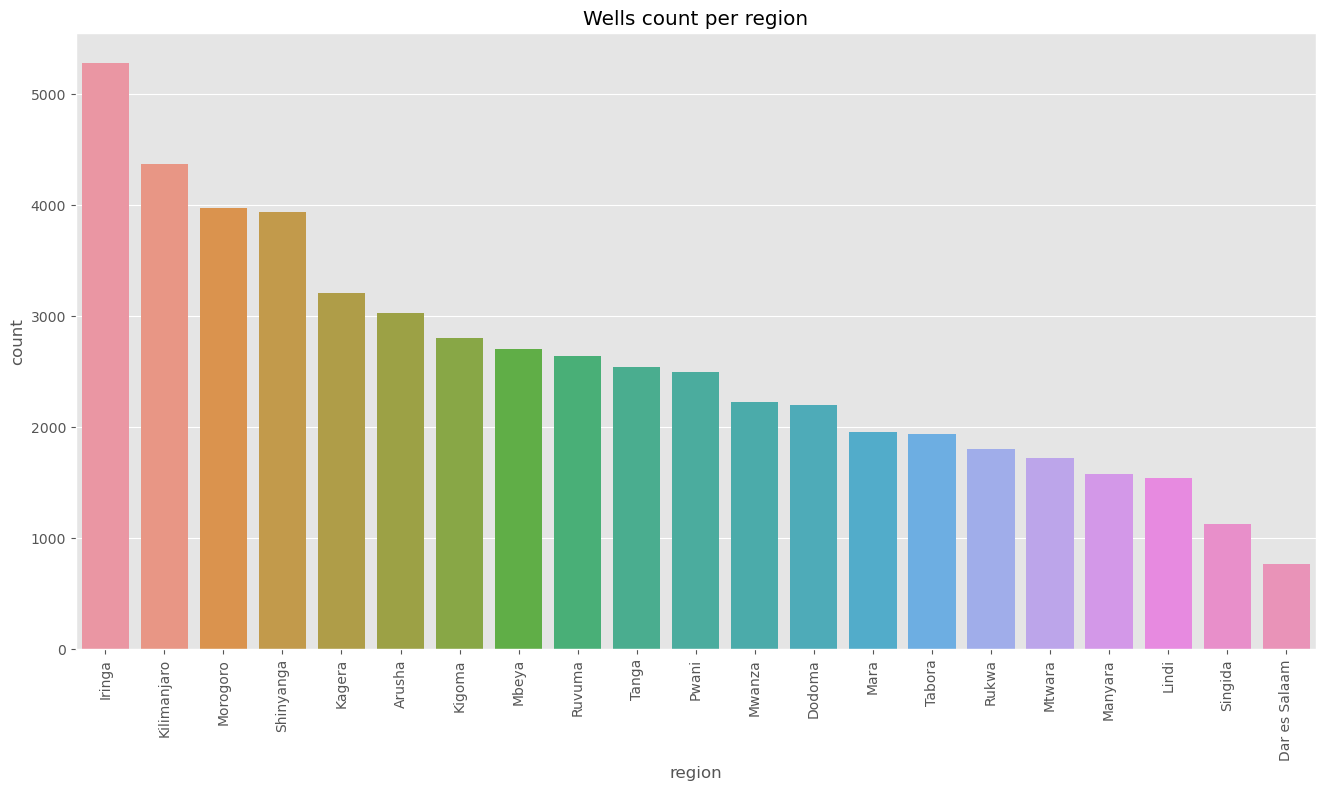

In [126]:
# Analysing region column
plt.figure(figsize=(16,8))
sns.countplot(x = data.region,
              order = data['region'].value_counts().index).set(title="Wells count per region")
plt.xticks(rotation=90);

**Observations:**

From the analysis, Iringa region has the greatest number of wells, while Dar es Salaam has the least number.

#### Feature permit

In [127]:
# Count of number of wells per permit
permit_dict = dict(zip(list(data.permit.value_counts().index),
                       list(data.permit.value_counts().values)))
permit_dict

{True: 37564, False: 16280}

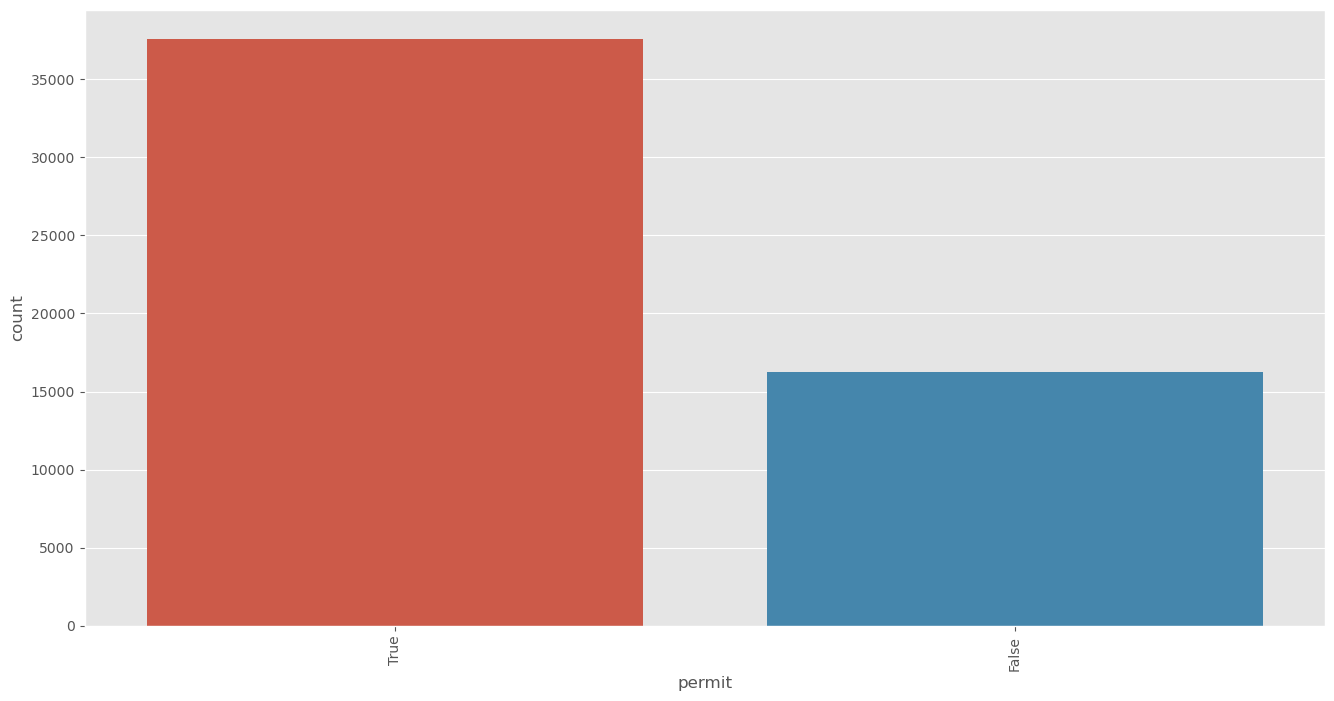

In [128]:
# Analysing permit column
plt.figure(figsize=(16,8))
sns.countplot(x = data.permit,
              order = data['permit'].value_counts().index)
plt.xticks(rotation=90);

**Observations:**

According to the visualisation, most waterpoints have been granted permission to exist

#### Feature population

In [129]:
summary_statistics = data['population'].describe()
print("Total number of people around the wells is",summary_statistics[0])
print("\n")
print("The average number of people living around the wells is",summary_statistics[1])
print("\n")
print("The minimum population value is",summary_statistics[3])
print("\n")
print("The maximum population value is",summary_statistics[7])

Total number of people around the wells is 53844.0


The average number of people living around the wells is 192.85413416536662


The minimum population value is 0.0


The maximum population value is 30500.0


<Figure size 1600x800 with 0 Axes>

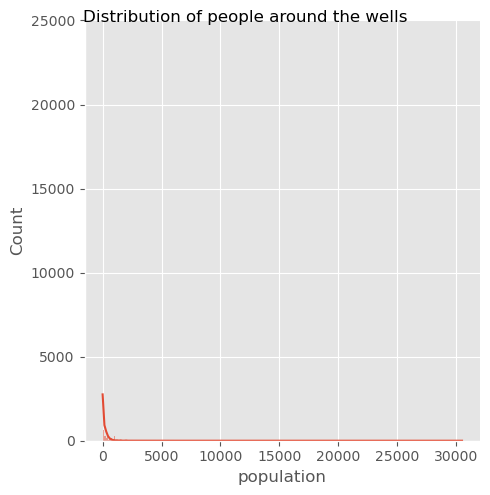

In [130]:
# plotting the distribution of population
plt.figure(figsize=(16,8))
sns.displot(data=data["population"], kde=True)
plt.suptitle("Distribution of people around the wells");

**Observations**

The number of people around the wells are not normally distributed.

#### Feature management_group

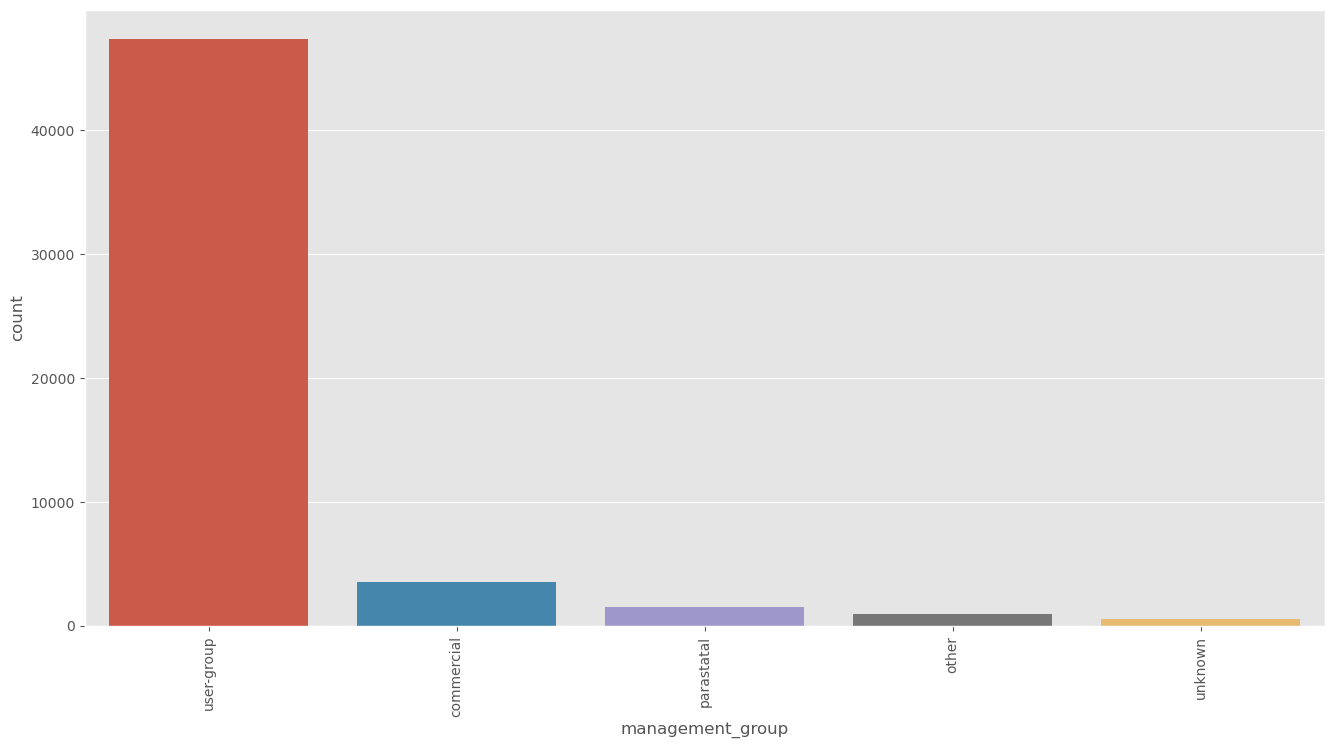

In [131]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'management_group', data=data, 
              order=data.management_group.value_counts()\
               .index).set_xticklabels(data.management_group.value_counts()\
               .index, rotation=90);

**Obsevation**

Majority of water wells are managed by user groups while water wells with unkown management are the least

#### Feature payment

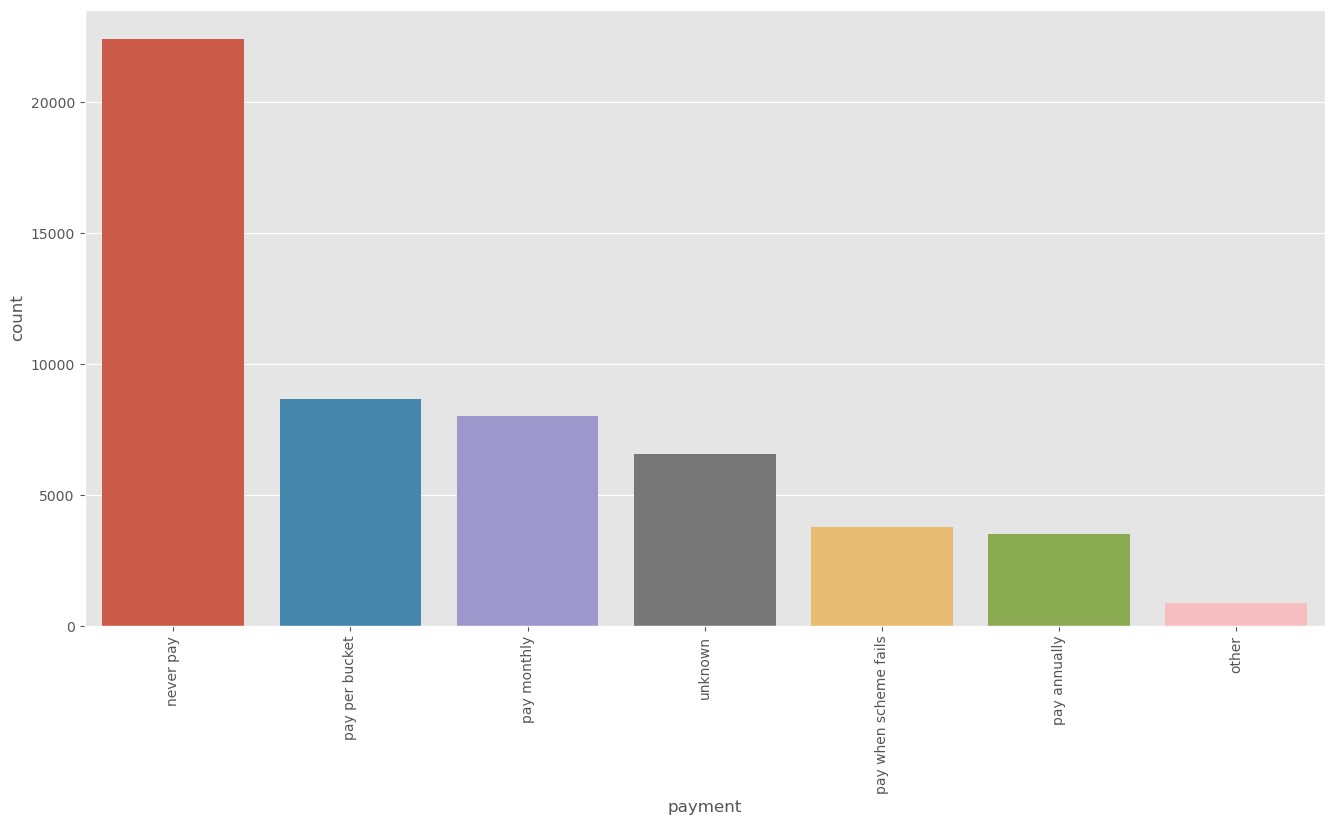

In [132]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'payment', data= data, order=data.payment.value_counts()
               .index).set_xticklabels(data.payment.value_counts()
               .index, rotation=90);

**Observation**

Majority of the water gotten from the water well is never paid for

#### Feature quality_group

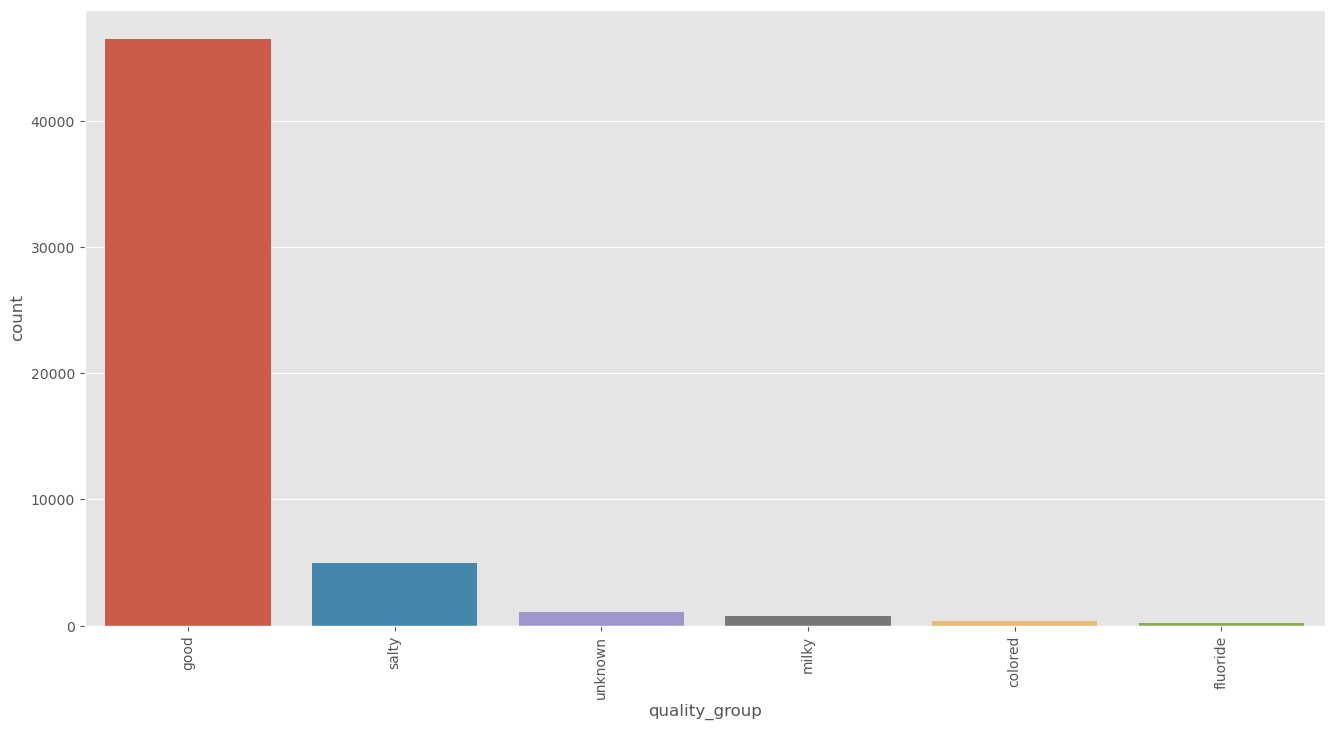

In [133]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'quality_group', data= data, order=data.quality_group.value_counts()
               .index).set_xticklabels(data.quality_group.value_counts()
               .index, rotation=90);

**Observation**

Majority of the water wells produce good quality water with wells which produce water with fluride are the least

#### Feature quantity

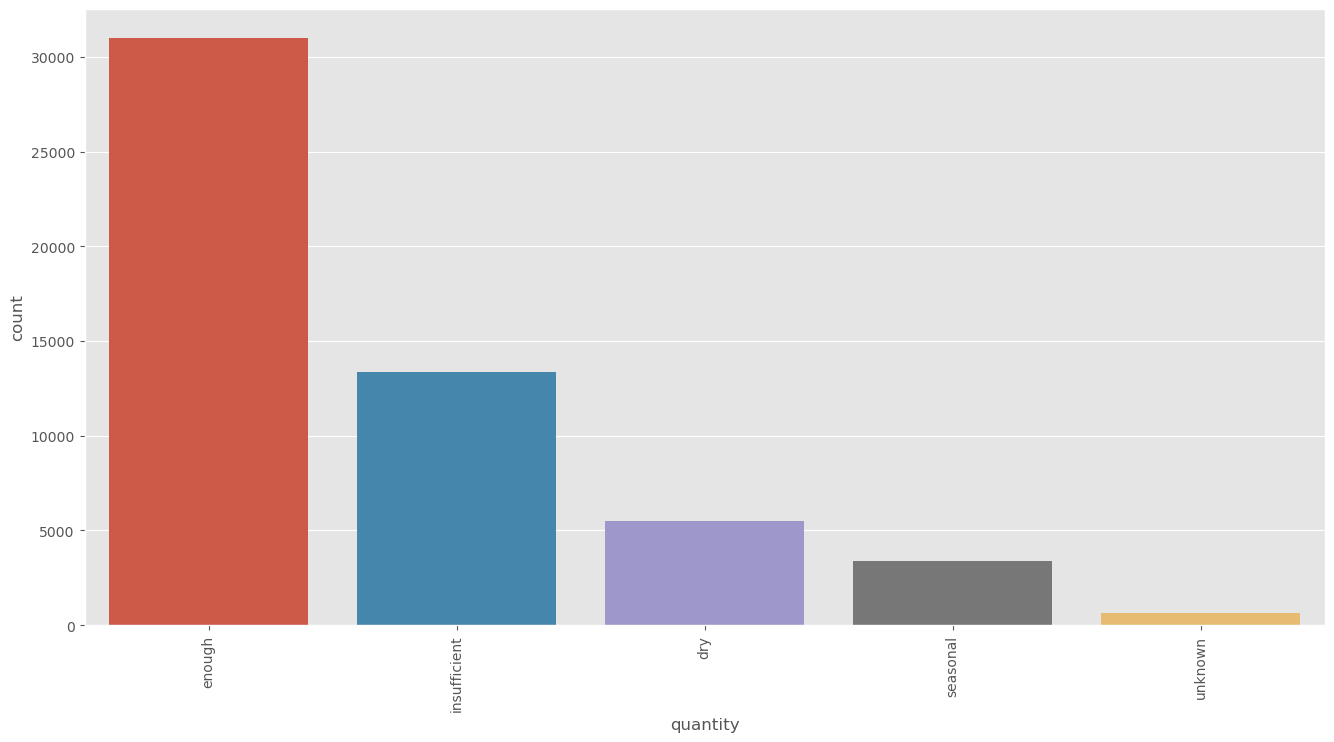

In [134]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'quantity', data= data, order=data.quantity.value_counts()
               .index).set_xticklabels(data.quantity.value_counts()
               .index, rotation=90);

**Observation** 

Majority of water wells have enough water with water wells with insufficient water being second. Waterpoints with an unknown quantity of water are the least

#### Feature source_class

In [ ]:
# Visualize the distribution using a count plot
plt.figure(figsize=(16,8))
sns.countplot(x= 'source_class', data= data, order=data.source_class.value_counts()
               .index).set_xticklabels(data.source_class.value_counts()
               .index, rotation=90);

**Observation**

Most waterpoints get their water from ground water sources according to the data

### Bivariate Analysis

#### What is the relationship between amount_tsh and status_group

Text(0.5, 0.98, 'Total static head vs status group')

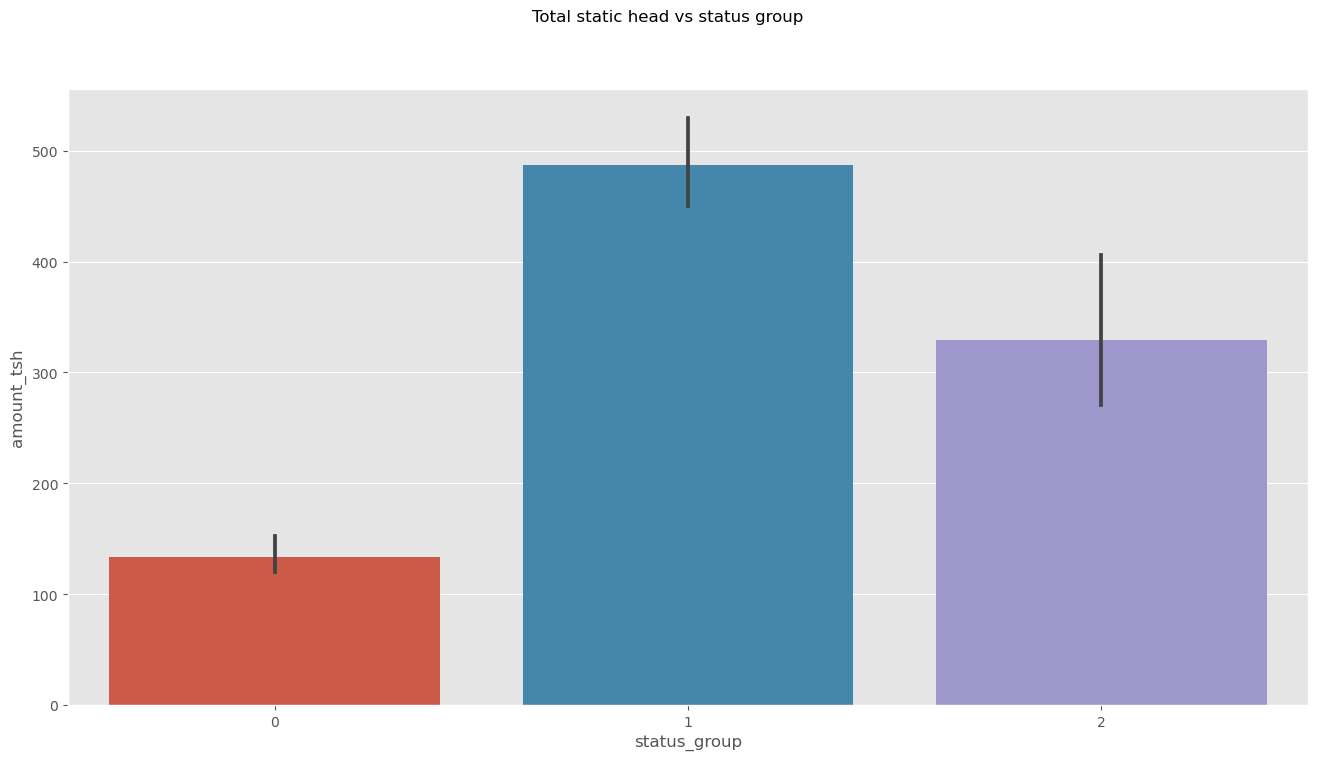

In [135]:
# plotting the distribution of amount by status group
plt.figure(figsize=(16,8))
sns.barplot(x='status_group', y ='amount_tsh',
                data=data)
plt.suptitle("Total static head vs status group")

**Observations:**

Functional water points have the highest amount of water available followed by those that are functional but need repair.
Non functional water points had the least amount of water available

#### What is the relationship between gps_height and status_group?

Text(0.5, 0.98, 'Height vs status group')

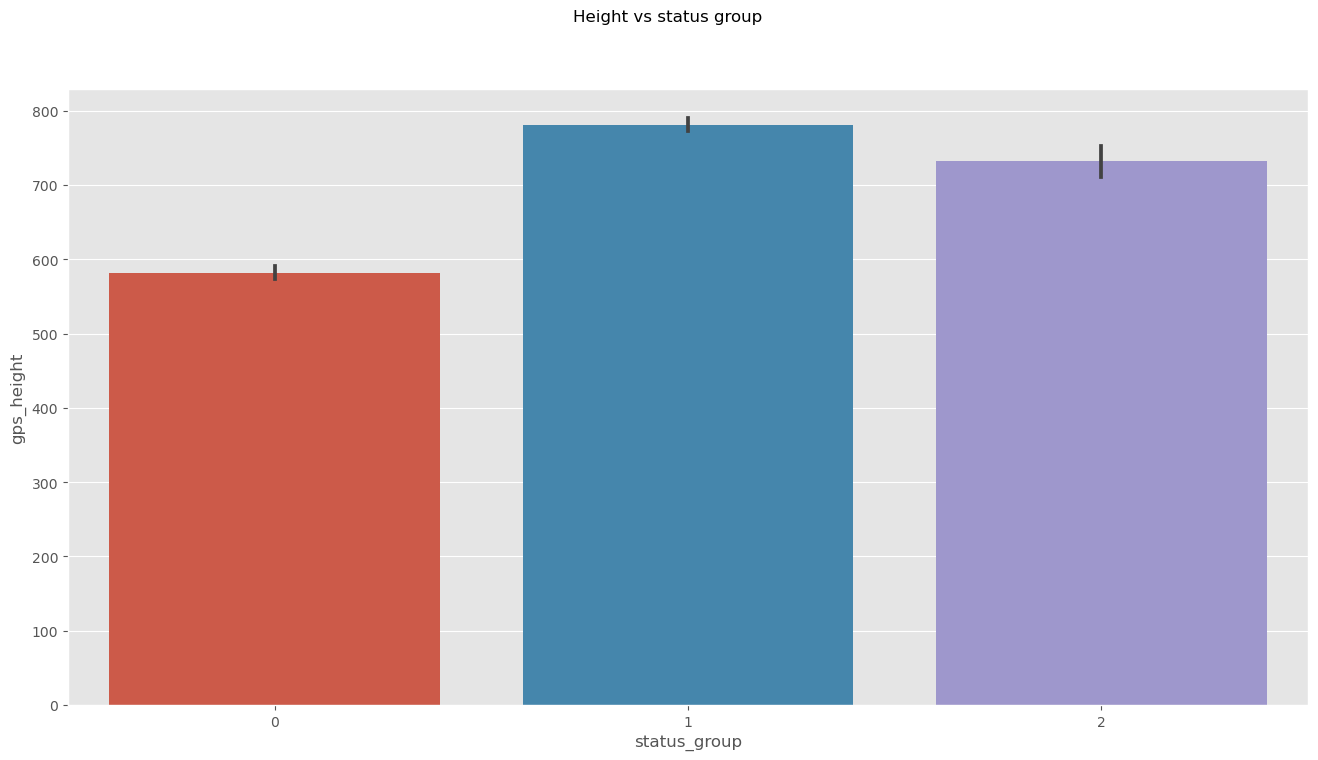

In [136]:
# Plotting the relationship between gps_height and status_group
plt.figure(figsize=(16,8))
sns.barplot(x='status_group', y ='gps_height',
                data=data)
plt.suptitle("Height vs status group")

**Observations:**
Functional waterpoints are generally located at higher altitudes than the rest.

#### What is the relationship between waterpoint_type and status_group?

AttributeError: 'numpy.int64' object has no attribute 'startswith'

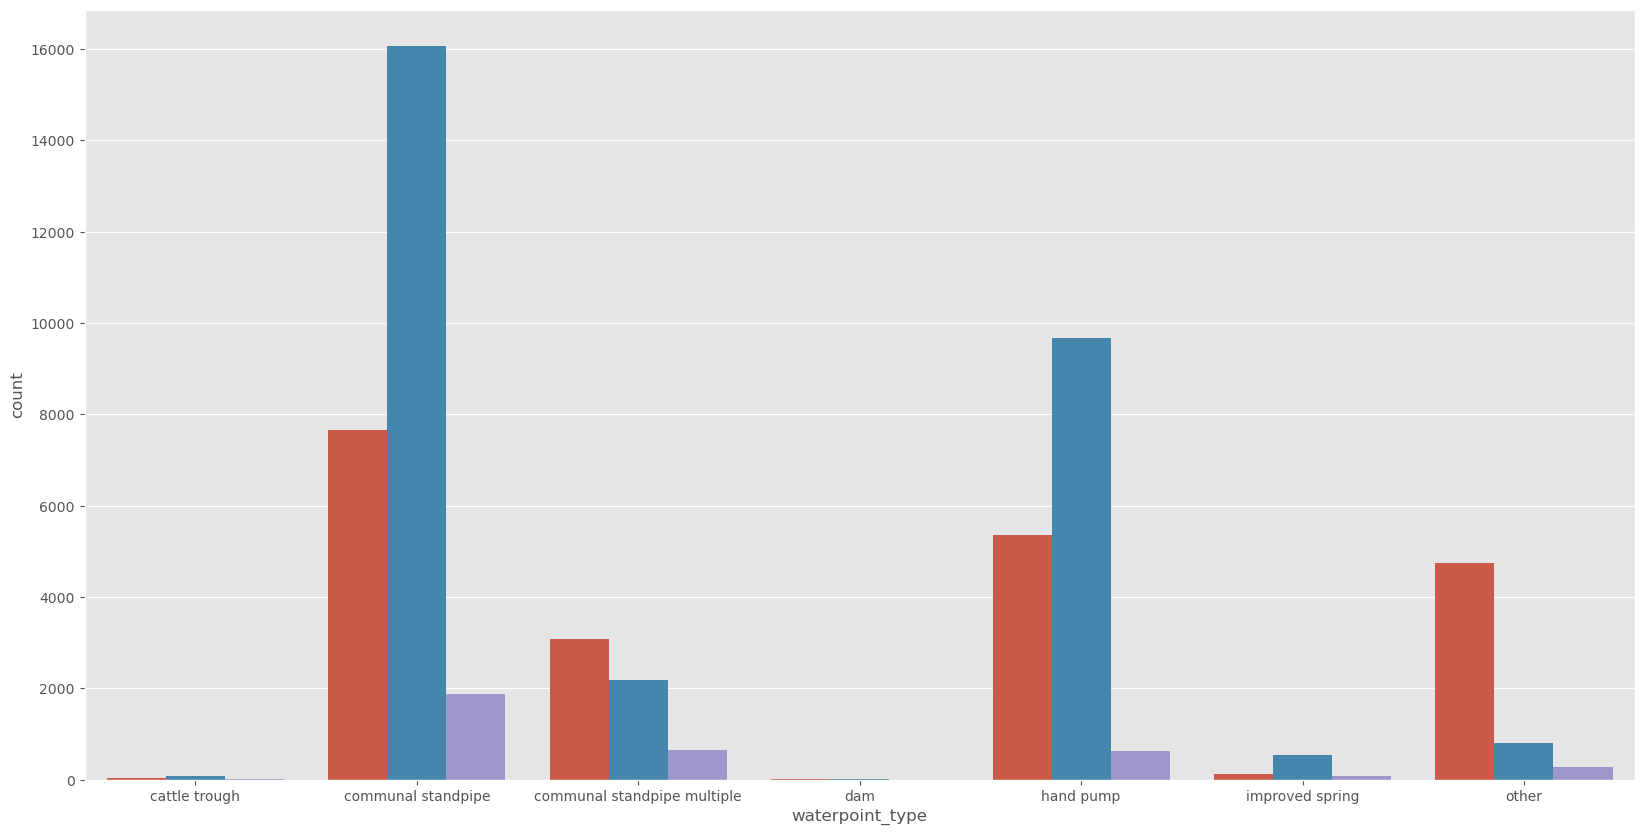

In [137]:
#comparing the water point type with the target varible.
plt.figure(figsize=(20,10))
sns.countplot(x='waterpoint_type', hue="status_group", data=data)
plt.show()

**Observations**

Communal standpipe has more count and functional water points are generally more than the others in except communal standpipe and other. This may be due to the fact that is is the most popular water point.

#### What is the relationship between payment and status_group?

In [ ]:
# plotting the relationship between payment and status_group
plt.figure(figsize=(20,10))
sns.countplot(x='payment',hue="status_group", data=data)
plt.suptitle("payment vs status group")
plt.show()

**Observations:**

Most waterpoints that are not paid for are non functional.
Most waterpoints that are paid for are functional.

#### What is the relationship between waterpoint_type and status_group?

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='waterpoint_type', hue="status_group", data=data)
plt.suptitle("Which waterpoint types are functional?")
plt.show()

**Observations**

Most waterpoint types are functional, except communal standpipe multiple and other
For communal standpipe multiple, this may be due to the presence of many moving parts or complicated technology.

#### What is the relationship between basin and status_group?

In [ ]:
# Analysing basin based on the functionality of the wells
data["basin"].groupby(data['status_group']).value_counts()

In [ ]:
# count of functional and non-functional wells based on the basin
fig = plt.subplots(figsize = (16,8))
sns.countplot(x= 'basin', hue= 'status_group', data= data, 
              order=data.basin.value_counts()\
              .index).set_xticklabels(data.basin.value_counts()
               .index,rotation=90);

**Observations**

In accordance with the analysis, Lake Victoria basin has the largest number of well non functional wells and functional wells.

Lake Nyasa basin has the lowest number of non functional wells.

Lake Rukwa basin has the lowest number of funtional wells.

#### What is the relationship between region and status_group?

In [ ]:
# count of functional and non-functional wells based on the basin
fig = plt.subplots(figsize = (16,8))
sns.countplot(x= 'region', hue= 'status_group', data= data, 
              order=data.region.value_counts()\
              .index).set_xticklabels(data.region.value_counts()
               .index, rotation=90);

#### What is the relationship between population and status_group?

In [ ]:
# plotting the relationship between population and status group
plt.subplots(figsize = (16,8))
sns.barplot(data = data,x = 'status_group', y = 'population', hue = "status_group")
plt.suptitle("Population around the wells by status group")
plt.legend(loc='upper right')
plt.show();

**Observation**

Functional wells seem to have more population around them generally than other status groups.

#### What is the relationship between permit and status_group?

In [ ]:
# Analysing if the functionality of the wells is affected by permit
data["permit"].groupby(data['status_group']).value_counts()

In [ ]:
# plotting permit by status group
plt.subplots(figsize = (16,8))
sns.countplot(x= 'permit', hue= 'status_group', data= data)
plt.suptitle("Permit vs status group")

**Observations**

Most of the non functional wells have been given permission to exist.

Most of the functional wells have been given permission to exist

#### What is the relationship between status_group and management_group?

In [ ]:
# Visualise distribution of functional wells in management group
plt.figure(figsize=(16,8))
sns.countplot(x= 'management_group', 
              hue= 'status_group', 
              data= data, 
              order=data.management_group.value_counts().index)\
             .set_xticklabels(data.management_group.value_counts().index, rotation=90);



**Observation**

The data shows all mangement groups but unknown have a higher number of funtional wells than non-funtional wells

Water points with user group management have the highest number of both funtional and non-functional wells

#### What is the relationship between status_group and quality_group?

In [ ]:
# Visualise distribution of functional wells in quality groups
plt.figure(figsize=(16,8))
sns.countplot(x= 'quality_group', 
              hue= 'status_group', 
              data= data, 
              order=data.quality_group.value_counts()
               .index).set_xticklabels(data.quality_group.value_counts()
               .index, rotation=90);

**Observation**

From the analysis above we see that water points with good, salty, milky and colored quality water have a higher number of funtional water wells compared to non-funtional wells
For water points with unknown and fluoride water quality the number of non-funtional water wells is higher than the 
number of functional wells

#### What is the relationship between status_group and quantity?

In [ ]:
# Visualise distribution of functional wells in quantity categories
plt.figure(figsize=(16,8))
sns.countplot(x= 'quantity', hue= 'status_group', data= data, order=data.quantity.value_counts()
               .index).set_xticklabels(data.quantity.value_counts()
               .index, rotation=90);

**Observation**

From the analysis above we see that water points with enough, insufficient and seasonal quantity categories have a higher number of funtional water water points compared to non-funtional waterpoints and those that need repair. For water points with unknown and dry quantity categories the number of non-funtional water wells is higher than the number of functional wells.

#### What is the relationship between status_group and source_class?

In [ ]:
# Visualise distribution of functional wells in source class
plt.figure(figsize=(16,8))
sns.countplot(x= 'source_class', hue= 'status_group', data= data, order=data.source_class.value_counts()
               .index).set_xticklabels(data.source_class.value_counts()
               .index, rotation=90);

**Observation**

The visualization shows that all the source classes have a higher number of funtional wells compared to non-funtional wells

## Conclusion

- The entity that funds most of the waterpoints going by the analysis is the Government of Tanzania and they are also the second most installers of the waterpoints thus it makes sense that they are the chosen stakeholders for this investigation.

- Communal standpipe seems to be the most popular waterpoint type.

- Most water points that are not paid for are non functional.

- Most water points that are paid for are functional.

- Dry water points have more non functional wells than functional wells.

- Most of Communal stand pipe multiple are non-functional. This may be due to many moving parts that may cause a higher risk of damage.

- Enough water quantity has the largest amount of water available and most of it is surface water.,

- Most of the source class of the water point types is ground water.

- For ground water to be at least 100,000 units of total static head, it must be of enough quantity

- For extraction type submersible has the most amount of water available in the data despite not registering some of the highest heights.

- Motorpumps and submersible are generally located in low altitude areas, possibly because while there it is nearer to the water table than at a higher altitude.

- For a handpump to have water available above the median amount of total static head, it needs to be above a height of 500 meters above sea level

- Wind powered and rope pump have the least amount of water available.

- The visualization shows that for waterpoints that extract water through gravity, submersible, wind-powered and motorpump the two main waterpoint types are communal standpipe and communal standpipe population. They apply a bit of technology than the rest.

- The visualization shows that water points that produce good quality water have the highest amount of water with most of the water points being functional.

- Milky quality have the least amount of water available.

- From the inforgraphic above, we can deduce that most of the wells in Tanzania have non functional wells with the central part of the nation not densely populated.

- Close to the large water bodies, most wells are non functional. This may probably be a reason why most wells are not maintained.

## Recommendation

- Investments should be channeled towards communal standpipe and not communal standpipe multiple because most of them are non functional.

- The government should not allow 'The Tragedy of commons' since it clearly affects the functionality of water points. This is shown by the fact that water points that are never paid for are non functional. This may be due to the fact that nobody takes responsibility for them to ensure proper care of the water point thus they get easily damaged.

- The central parts of the country do not have enough wells, probably because of the lower population in those areas but the government should ensure that water is enough for those who live around there.